# Código Day 16 del #30DayMapChallenge
## @Jorge A. Zampieri
## Data: FAO WaPor(https://lnkd.in/dmZhmiAH)

In [1]:
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
import numpy as np
import contextily as ctx
from matplotlib.colors import Normalize, LinearSegmentedColormap

In [2]:
# Cargar el archivo GeoJSON de polígonos
polygons = gpd.read_file("C:/Users/VICTUS/OneDrive/LinkedIn/30DayChallenge - copia/Day16/Mun.geojson")

In [3]:
# Cargar la imagen ráster de biomasa
with rasterio.open("C:/Users/VICTUS/OneDrive/LinkedIn/30DayChallenge - copia/Day16/Biomassa.tif") as src:
    image = src.read(1)
    affine = src.transform

In [ ]:
# Calcular las estadísticas zonales (media de biomasa por polígono)
stats = zonal_stats(polygons, image, affine=affine, stats='max')
polygons['biomasa_mediamax'] = [stat['max'] for stat in stats]

In [ ]:
# Definir la escala de colores de blanco a verde oscuro
cmap = plt.cm.Greens
norm = plt.Normalize(vmin=polygons['biomasa_mediamax'].min(), vmax=polygons['biomasa_mediamax'].max())
polygons['color'] = polygons['biomasa_mediamax'].apply(lambda x: cmap(norm(x)))

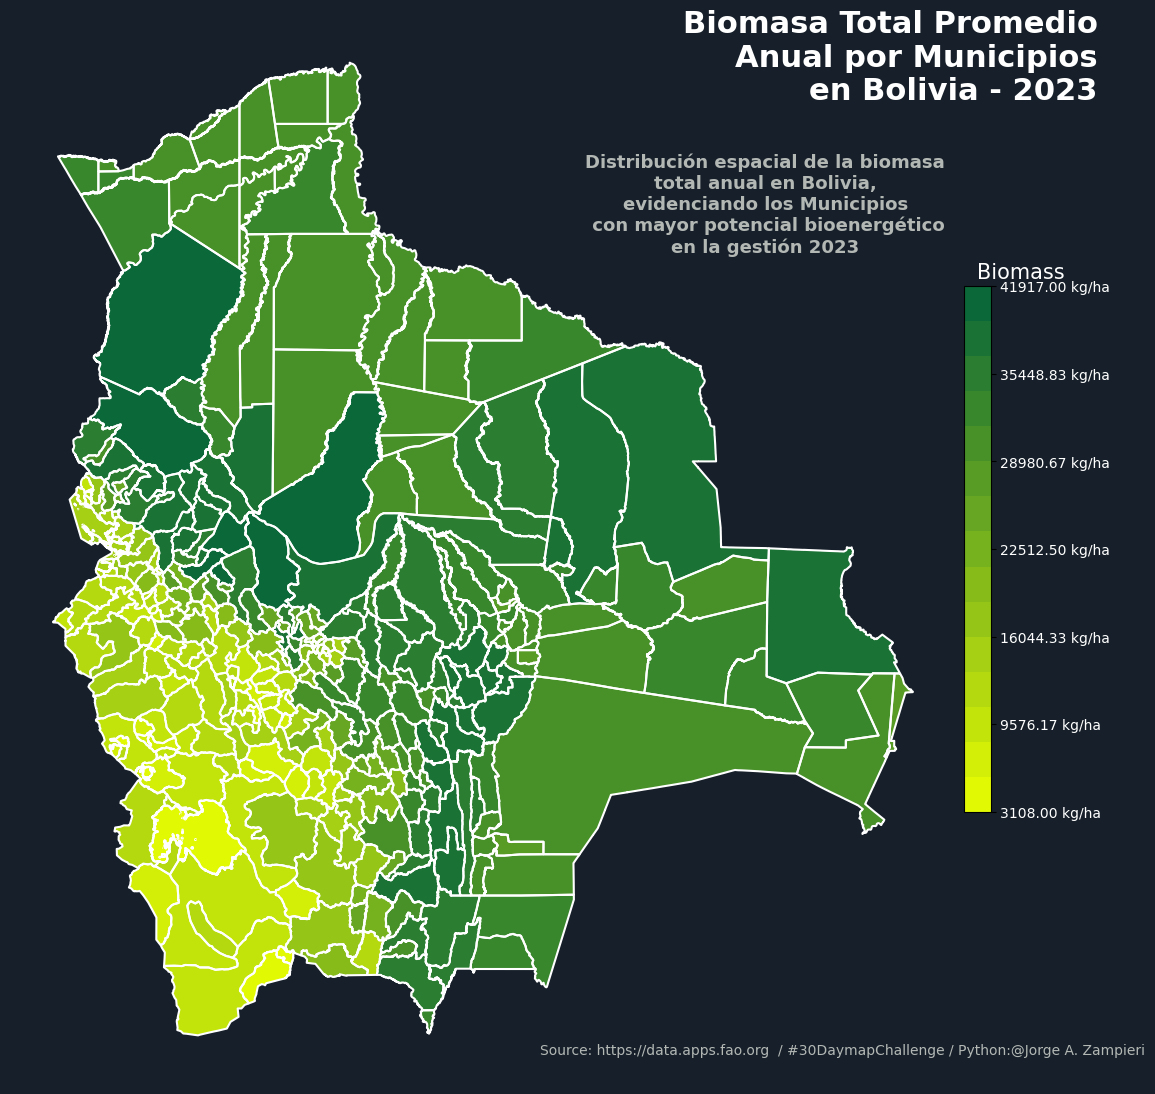

In [ ]:
# Configurar el rango de valores para la barra de colores
min_biomass = polygons["biomasa_mediamax"].min()
max_biomass = polygons["biomasa_mediamax"].max()
bins = np.linspace(min_biomass, max_biomass, 7)

# Crear el mapa de colores
cmap = LinearSegmentedColormap.from_list("BiomassColors", ["#e2f904", "#0b6838"], N=15)
norm = Normalize(vmin=min_biomass, vmax=max_biomass)

# Crear el mapa
fig, ax = plt.subplots(figsize=(12, 11))
fig.patch.set_facecolor('#17202a')  # Fondo de color

# Dibujar los polígonos y sus bordes
polygons.boundary.plot(ax=ax, edgecolor='white')
polygons.plot(column="biomasa_mediamax", cmap=cmap, legend=False, ax=ax)

# Añadir barra de colores con rangos personalizados
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.025, pad=0.008, ticks=bins)
cbar.ax.set_yticklabels([f"{b:.2f} kg/ha" for b in bins], color='white')  # Mostrar los rangos en la leyenda
cbar.ax.set_title('Biomass', fontsize=15, color='white', ha='left')

# Personalizar el título y texto adicional
plt.figtext(1.15, 0.92, 'Biomasa Total Promedio\nAnual por Municipios\nen Bolivia - 2023', fontsize=22, color='white', weight='bold',
        transform=ax.transAxes, ha='right')

plt.figtext(0.7, 0.77, 'Distribución espacial de la biomasa\ntotal anual en Bolivia,\nevidenciando los Municipios\n con mayor potencial bioenergético\nen la gestión 2023', 
            weight='bold', fontsize=13, ha='center', color='#b3b8b5')

ax.annotate('Source: https://data.apps.fao.org  / #30DaymapChallenge / Python:@Jorge A. Zampieri', xy=(1.2, 0.025), xycoords='axes fraction',
            horizontalalignment='right', verticalalignment='bottom', fontsize=10, color='#b3b8b5')

# Quitar ejes
ax.axis("off")

#guardar el mapa
#plt.savefig('Day16_Choropleth.png', bbox_inches='tight', dpi=600)

# Mostrar el mapa
plt.tight_layout()
plt.show()
     

